We all love to eat various cusines. Let's look at Indian Food and its various entrees and desserts. I picked this dataset from Kaggle. So let's get started on our journey to learn more about the food.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling
from sklearn. model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,RandomizedSearchCV
import os
import seaborn as sns
import pandas_profiling

#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class


Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [3]:
#Read and clean up training data
df_train = pd.read_csv("/indian_food_101/indian_food_!.csv")


In [4]:

print(df_train.head())
print(df_train.describe())

             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  
        prep_time   cook_time
count  255.000

In [5]:
#Let's figure out how many recipes/dishes are in each region for this data set
print(df_train['region'].value_counts())

West          75
South         61
North         57
East          32
North East    27
Central        3
Name: region, dtype: int64


I could probably have displayed the counts of spicy and sweet food per region. Northern region here has more spicy flavored food than sweet. North East is pretty balanced in spicy and sweet items. 

In [12]:
df_train['nonvege'] = 0
df_train['sweet'] = 0
df_train['spicy'] = 0
df_train['vege'] = 0
df_train.loc[df_train['diet'].str.contains('non vegetarian',regex=False) == True,"nonvege"] = 1
df_train['vege'] = 1 - df_train['nonvege']

df_train.loc[df_train['flavor_profile'].str.contains('sweet',regex=False) == True,"sweet"] = 1
df_train.loc[df_train['flavor_profile'].str.contains('spicy',regex=False) == True,"spicy"] = 1


print(df_train.groupby(['region', 'spicy']).size().reset_index(name='counts'))
print(df_train['nonvege'].value_counts())
print(df_train['spicy'].value_counts())
print(df_train['sweet'].value_counts())



        region  spicy  counts
0      Central      0       1
1      Central      1       2
2         East      0      25
3         East      1       7
4        North      0      17
5        North      1      40
6   North East      0      14
7   North East      1      13
8        South      0      26
9        South      1      35
10        West      0      33
11        West      1      42
0    226
1     29
Name: nonvege, dtype: int64
1    139
0    116
Name: spicy, dtype: int64
0    167
1     88
Name: sweet, dtype: int64


These plots are interesting and self explanatory!

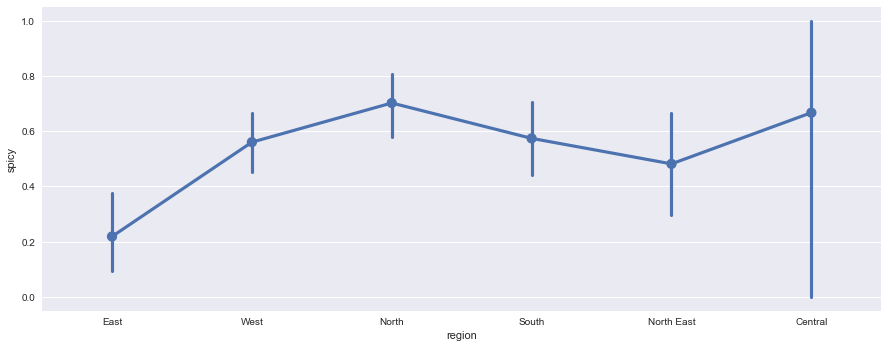

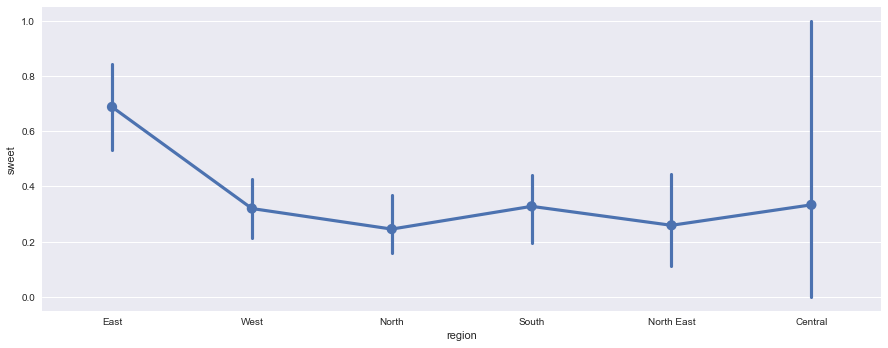

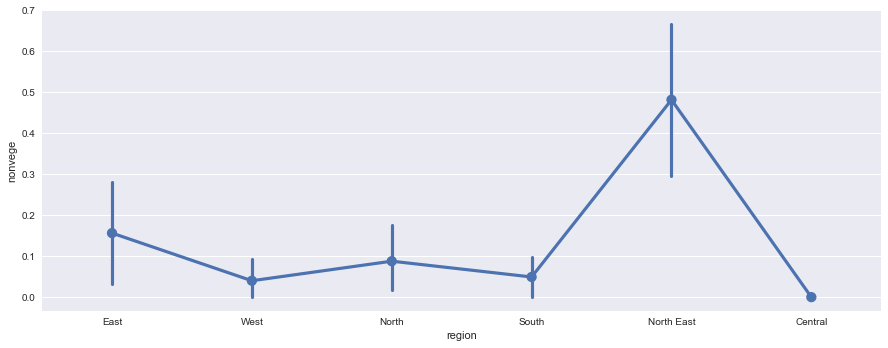

In [13]:
df = df_train.dropna()
axes = sns.factorplot('region', 'spicy', data=df, aspect=2.5)
axes = sns.factorplot('region', 'sweet', data=df, aspect=2.5)
#axes = sns.factorplot('region', 'vege', data=df, aspect=2.5)
axes = sns.factorplot('region', 'nonvege', data=df, aspect=2.5)

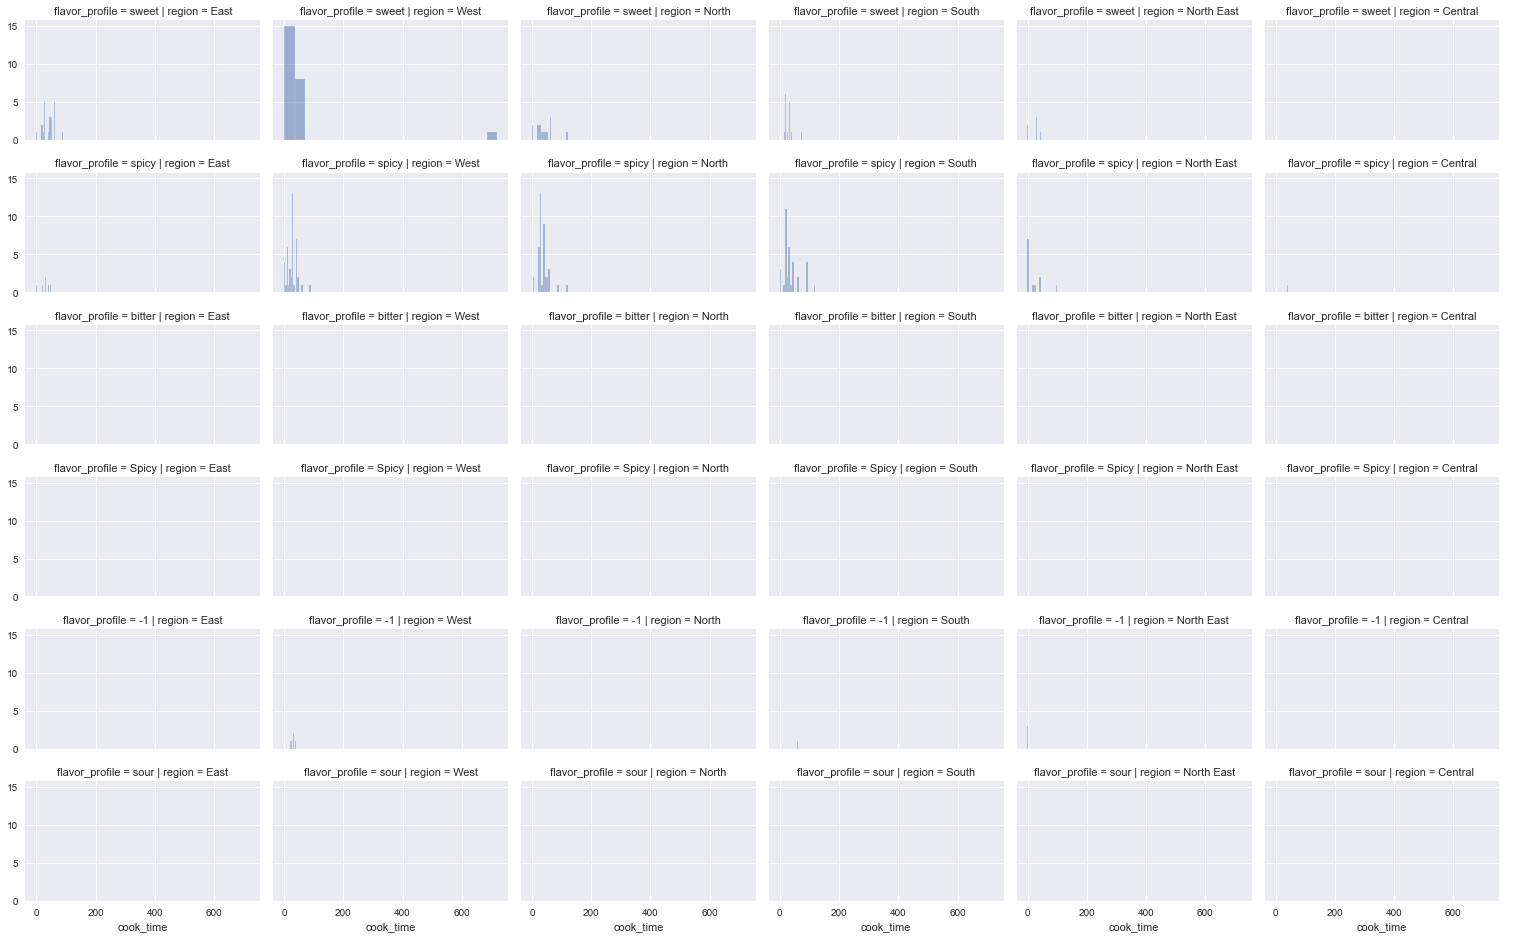

In [14]:
grid = sns.FacetGrid(df_train, col='region', 
                    row='flavor_profile', size=2.2, aspect=1.6)
grid.map(plt.hist, 'cook_time', alpha=0.5, bins=20)
grid.add_legend();

Let's get a bit more visual using Seaborn on how flavors and regions are spread

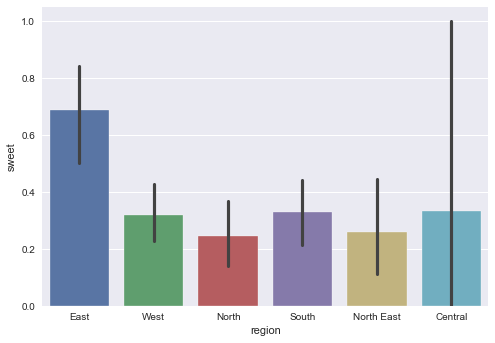

In [15]:
sns.barplot(x='region', y='sweet', data=df_train)
#sns.barplot(x='region', y='spicy', data=df_train)

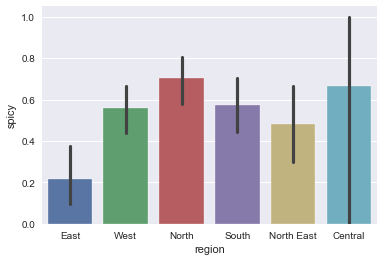

In [13]:
sns.barplot(x='region', y='spicy', data=df_train)

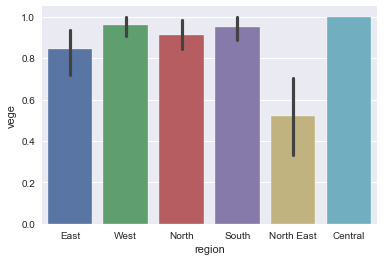

In [14]:
sns.barplot(x='region', y='vege', data=df_train)

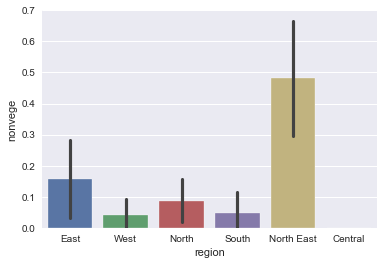

In [15]:
sns.barplot(x='region', y='nonvege', data=df_train)

Let's take this a bit more on how various course of meals are distributed over the regions. No surprise that desserts are vegeterian. From this dataset, it looks South has really less non vegeterian dishes, really? 

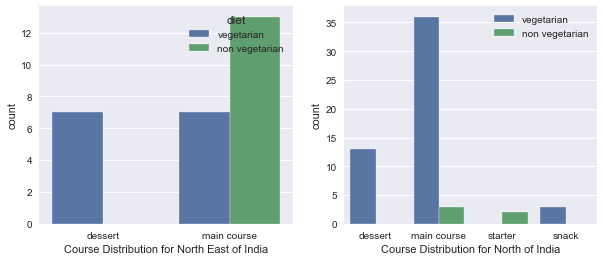

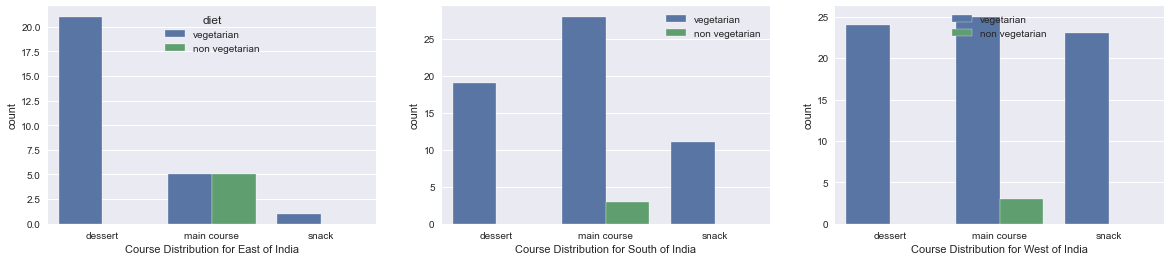

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

df = df_train[df_train['region'] == 'North East']
ax = sns.countplot(x ='course', hue='diet',data = df, ax = axes[0]) 
ax.set_xlabel("Course Distribution for North East of India")


df1 = df_train[df_train['region'] == 'North']
ax = sns.countplot(x ='course', hue='diet',data = df1, ax=axes[1]) 
ax.set_xlabel("Course Distribution for North of India")
ax.legend()

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))

df2 = df_train[df_train['region'] == 'East']
ax = sns.countplot(x ='course', hue='diet',data = df2, ax = axes[0]) 
ax.set_xlabel("Course Distribution for East of India")


df3 = df_train[df_train['region'] == 'South']
ax = sns.countplot(x ='course', hue='diet',data = df3, ax=axes[1]) 
ax.set_xlabel("Course Distribution for South of India")
ax.legend()

df4 = df_train[df_train['region'] == 'West']
ax = sns.countplot(x ='course', hue='diet',data = df4, ax=axes[2]) 
ax.set_xlabel("Course Distribution for West of India")
ax.legend()

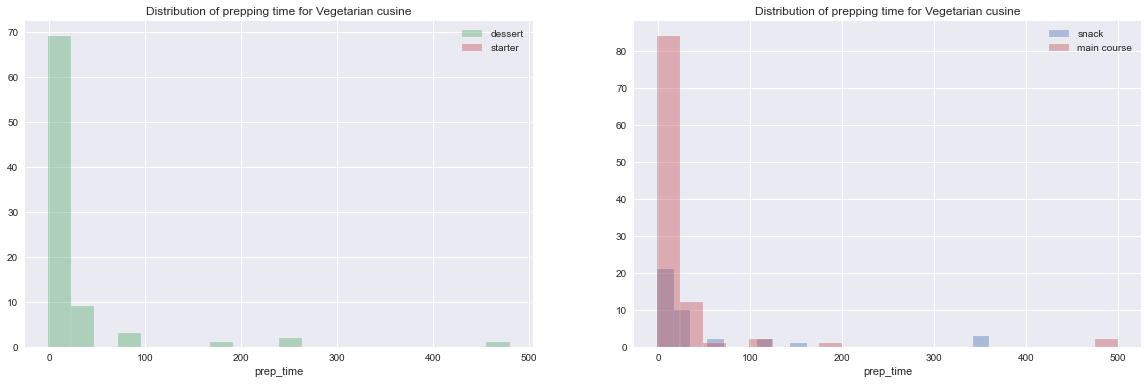

In [16]:
nonveg = df_train[df_train['diet']=='non vegetarian']
veg = df_train[df_train['diet']=='vegetarian']

#Trim the prep times for vege dishes that are sweet
vegd = veg[veg['course'] == 'dessert'].prep_time.dropna()
veg_s = veg[veg['course'] == 'starter'].prep_time.dropna()
veg_sn = veg[veg['course'] == 'snack'].prep_time.dropna()
veg_mc = veg[veg['course'] == 'main course'].prep_time.dropna()


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 6))
ax = sns.distplot(vegd, bins=20, label = 'dessert', ax = axes[0], kde = False, color = 'g')
ax = sns.distplot(veg_s, bins=20, label = 'starter', ax = axes[0], kde = False, color = 'r')
ax.legend()
ax.set_title('Distribution of prepping time for Vegetarian cusine')

ax = sns.distplot(veg_sn, bins=20, label = 'snack',ax = axes[1], kde = False, color = 'b')
ax = sns.distplot(veg_mc, bins=20, label = 'main course', ax = axes[1],kde = False, color = 'r')
ax.legend()

ax.set_title('Distribution of prepping time for Vegetarian cusine')
plt.show()

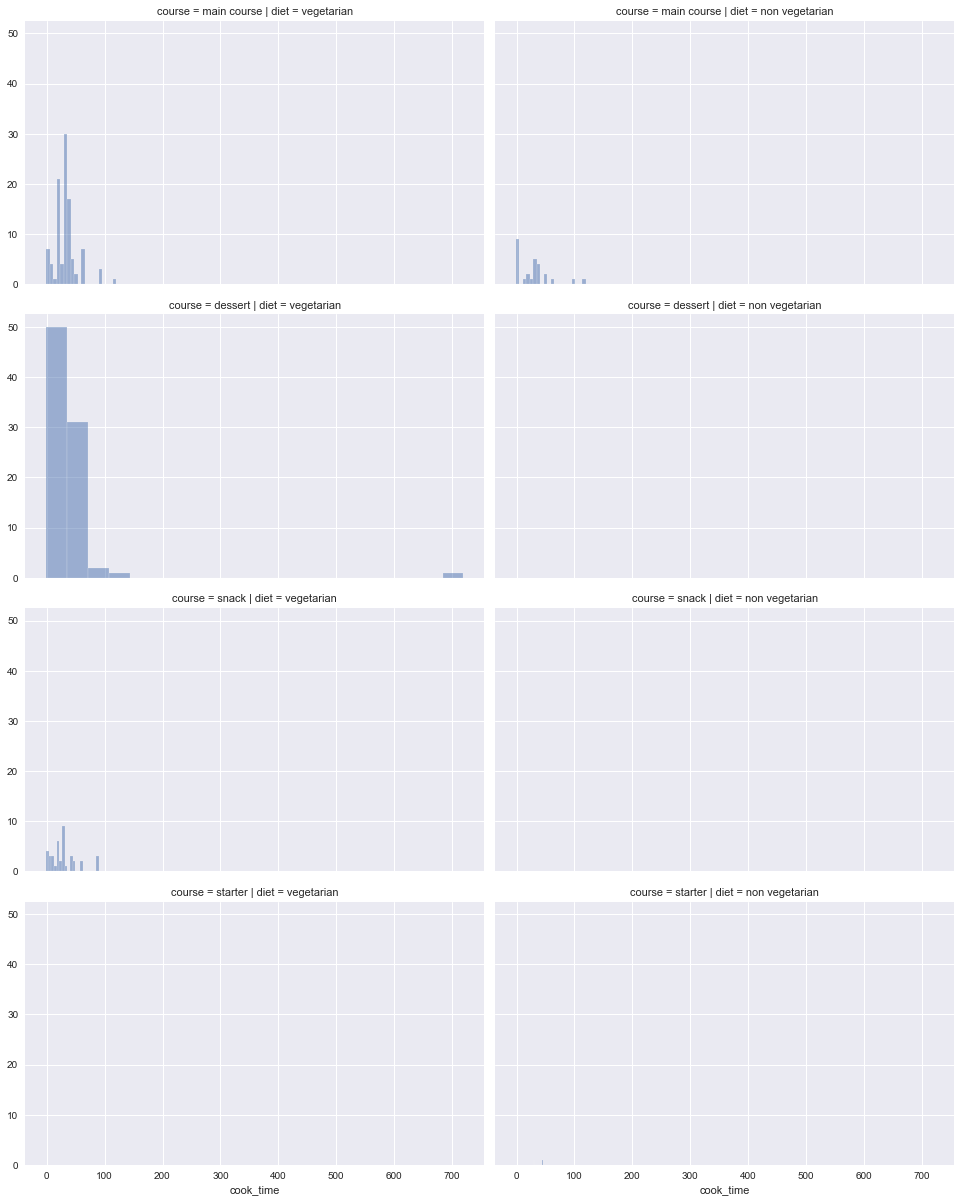

In [18]:
grid = sns.FacetGrid(df_train, col='diet', row_order=['main course','dessert','snack','starter'],
                    row='course', size=4.2, aspect=1.6)
#grid.map(plt.hist, 'prep_time', alpha=0.5, bins=20,color='r')
grid.map(plt.hist, 'cook_time', alpha=0.5, bins=20,color='b')
grid.add_legend();

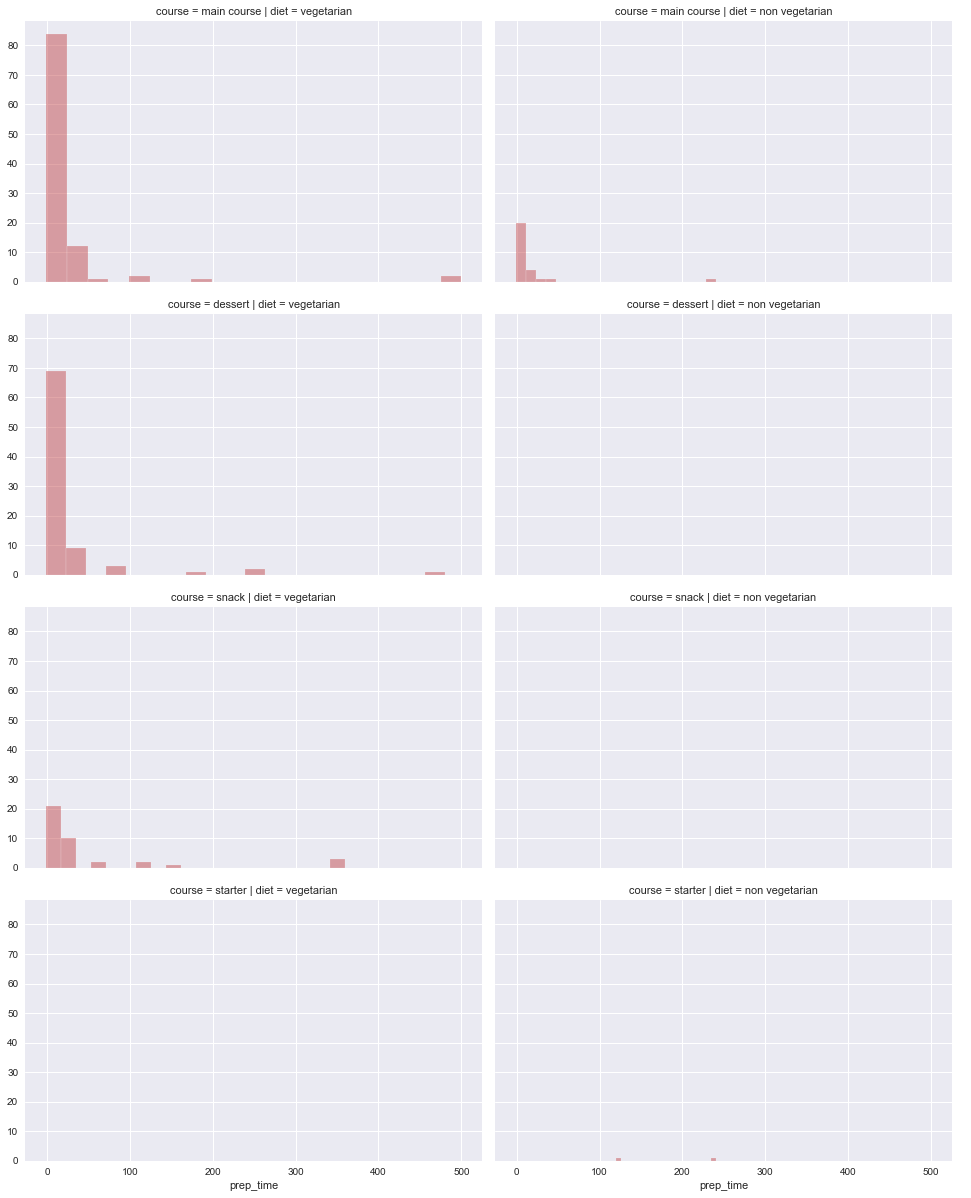

In [17]:
grid = sns.FacetGrid(df_train, col='diet', row_order=['main course','dessert','snack','starter'],
                    row='course', size=4.2, aspect=1.6)
grid.map(plt.hist, 'prep_time', alpha=0.5, bins=20,color='r')
#grid.map(plt.hist, 'cook_time', alpha=0.5, bins=20,color='b')
grid.add_legend();

I wanted to try out Waffle charts as I spent some earlier displays using seaborn.

In [18]:
from pywaffle import Waffle

In [19]:
#OVerall 
df_all_rc = df_train.groupby(['region','course']).count().drop(columns=['nonvege','sweet','spicy','ingredients','flavor_profile','state','vege','diet','cook_time','prep_time']).rename(columns={'Name':'Count'})
#.transpose()

df_all_rc1 = df_train.groupby(['region','course']).size().reset_index(name='count_1')
#print('HEAd =',df_all_rc.head())
#print(df_all_rc.to_csv("temp.csv"))
#print('cols =',df_all_rc.columns)
#print(df_all_survived.tolist())
#df_central = df_all_survived[df_all_survived['region'] == 'Central']
#print(df_central)
#print(df_all_rc['Central'])
#print("NEw columns = ",df_all_rc1.columns)
#print("col region values = ",df_all_rc1['region'][0])
print(df_all_rc1.head())
df_all_rc2 = df_all_rc1.drop(columns=['region'])
print(df_all_rc2.head())
print(len(df_all_rc2))

df_all_course = df_train.groupby(['course']).count().drop(columns=['region','nonvege','sweet','spicy','ingredients','flavor_profile','state','vege','diet','cook_time','prep_time']).rename(columns={'Name':'Count'})
print("len of df_all_course = ",len(df_all_course))
print(df_all_course)
print(df_all_course['name'])
count_list = df_all_course['name'].tolist()
print(df_all_course['name'].tolist())


    region       course  count_1
0  Central      dessert        1
1  Central  main course        1
2  Central        snack        1
3     East      dessert       21
4     East  main course       10
        course  count_1
0      dessert        1
1  main course        1
2        snack        1
3      dessert       21
4  main course       10
18
len of df_all_course =  4
             name
course           
dessert        85
main course   129
snack          39
starter         2
course
dessert         85
main course    129
snack           39
starter          2
Name: name, dtype: int64
[85, 129, 39, 2]


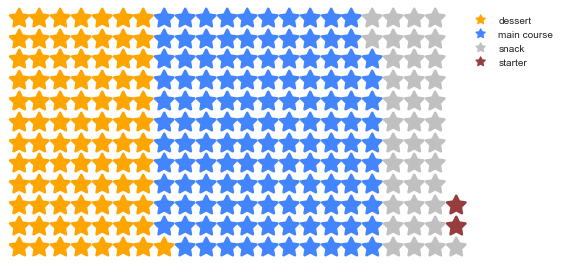

In [20]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=12,
    values=count_list,
    colors=["#FFA500", "#4384FF", "#C0C0C0","#983D3D"],
    #icons=['sun', 'cloud-showers-heavy', 'snowflake','sun','cloud-showers-heavy'],
    icons='star',
    font_size=20,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['dessert', 'main course', 'snack','starter'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)